In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import time
from utils.utils import DeAndC, construct_putative_corres, label_putative_corres, compute_prf, metric_plot,identify_reliable_corres
from cs_methods.ratiotest import ratio_test
from cs_methods.gms import gms
from cs_methods.lpm import lpm
from cs_methods.vfc import vfc
from cs_methods.rfm_scan import rfm_scan
from datasets.vgg import get_vgg

In [2]:
imgpairs=get_vgg(vgg_path="E:\\lab\\Datasets\\Correspondence_Selection\\VGG_datasets")
# from utils.utils import give_example
# img1, img2, H=imgpairs[9]
# give_example(img1, img2, H)
orb = cv2.ORB_create(
    nfeatures = 10000,
    scaleFactor = 1.2,
    nlevels = 8,
    edgeThreshold = 31,
    firstLevel = 0,
    WTA_K = 2,
    patchSize = 31,
    fastThreshold = 0)

['bark', 'bikes', 'boat', 'graf', 'leuven', 'trees', 'ubc', 'wall']
E:\lab\Datasets\Correspondence_Selection\VGG_datasets/bark/img1.ppm
E:\lab\Datasets\Correspondence_Selection\VGG_datasets/bikes/img1.ppm
E:\lab\Datasets\Correspondence_Selection\VGG_datasets/boat/img1.pgm
E:\lab\Datasets\Correspondence_Selection\VGG_datasets/graf/img1.ppm
E:\lab\Datasets\Correspondence_Selection\VGG_datasets/leuven/img1.ppm
E:\lab\Datasets\Correspondence_Selection\VGG_datasets/trees/img1.ppm
E:\lab\Datasets\Correspondence_Selection\VGG_datasets/ubc/img1.ppm
E:\lab\Datasets\Correspondence_Selection\VGG_datasets/wall/img1.ppm


In [3]:
CS = {'Ratio': ratio_test, 'GMS':gms, 'LPM': lpm, 'RFM_SCAN': rfm_scan, 'VFC': vfc}
results = identify_reliable_corres(imgpairs, CS, orb, orb, cv2.NORM_HAMMING)

putative set data existed~ 
Image pair 1 (512x765) ratio=0.3399: Ratio: 9.00ms GMS: 518.00ms LPM: 5.00ms RFM_SCAN: 3.00ms VFC: 3.00ms putative set data existed~ 
Image pair 2 (512x765) ratio=0.1439: Ratio: 9.00ms GMS: 8.00ms LPM: 8.00ms RFM_SCAN: 6.00ms VFC: 7.00ms putative set data existed~ 
Image pair 3 (512x765) ratio=0.0856: Ratio: 8.00ms GMS: 7.00ms LPM: 7.00ms RFM_SCAN: 4.00ms VFC: 3.00ms putative set data existed~ 
Image pair 4 (512x765) ratio=0.0482: Ratio: 8.00ms GMS: 6.00ms LPM: 5.00ms RFM_SCAN: 5.00ms VFC: 4.00ms putative set data existed~ 
Image pair 5 (512x765) ratio=0.0077: Ratio: 5.00ms GMS: 4.00ms LPM: 6.00ms RFM_SCAN: 6.00ms VFC: 5.00ms putative set data existed~ 
Image pair 6 (700x1000) ratio=0.7722: Ratio: 4.00ms GMS: 991.00ms LPM: 5.00ms RFM_SCAN: 6.00ms VFC: 4.00ms putative set data existed~ 
Image pair 7 (700x1000) ratio=0.7400: Ratio: 8.00ms GMS: 982.00ms LPM: 5.00ms RFM_SCAN: 3.00ms VFC: 4.00ms putative set data existed~ 
Image pair 8 (700x1000) ratio=0.6425: Ra

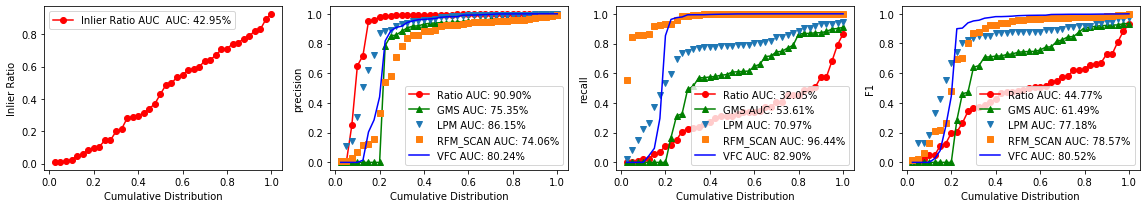

In [5]:
# 统计和对比
styles=["r-o","g-^","v","s", "b"]
CS_names=list(CS.keys())
metrics=["precision","recall","F1"]
# 1、inliers的比例分布
plt.figure(figsize=(20,3))
inl_ratio=np.array([i[0] for i in results])
plt.subplot(1,5,1)
metric_plot("Inlier Ratio AUC ",inl_ratio,styles[0])
plt.xlabel("Cumulative Distribution")
plt.ylabel("Inlier Ratio")
plt.legend()
for i in range(len(metrics)):
    m_name=metrics[i]
    plt.subplot(1,5,i+2)
    for j in range(len(CS_names)):
        run_time=np.array([i[1][CS_names[j]][m_name] for i in results])
        if m_name=="time":
            run_time=np.log(run_time)/np.log(10)
        metric_plot(CS_names[j],run_time,styles[j],m_name!="time")
    plt.xlabel("Cumulative Distribution")
    plt.ylabel(m_name)
    if m_name=="time":
        plt.yticks([0,1,2,3],[r"$10^0$",r"$10^1$",r"$10^2$",r"$10^3$"])
#     plt.ylim([0,1])
    plt.legend()
plt.tight_layout()
plt.show()

([<matplotlib.axis.YTick at 0x227a80352c8>,
 <a list of 3 Text yticklabel objects>)

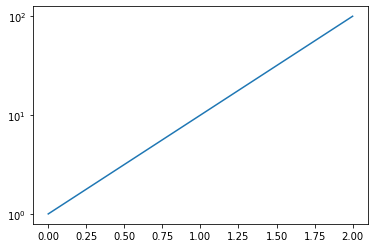

In [27]:
plt.plot([1,2,3])
plt.yticks([1,2,3],[r"$10^0$",r"$10^1$",r"$10^2$"])

In [ ]:
!